In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy
from tvb.simulator.lab import *

# Simulate with the Jansen and Rit model. 

White noise is added to one specific state variable to emulate the external
stochastic stimulus p(t) as described in [JansenRit_1995]

WARNING  File 'hemispheres' not found in ZIP.


c:\work\tvb\tvb-root\scientific_library\tvb\simulator\coupling.py:375: RuntimeWarning: overflow encountered in exp
  pre = self.cmax / (1.0 + numpy.exp(self.r * (self.midpoint - (x_j[:, 0] - x_j[:, 1]))))
C:\Users\romina.baila\.conda\envs\tvb-run\lib\site-packages\numba\np\ufunc\gufunc.py:170: RuntimeWarning: overflow encountered in _numba_dfun_jr
  return self.ufunc(*args, **kwargs)


Text(0.5, 1.0, 'Temporal Average')

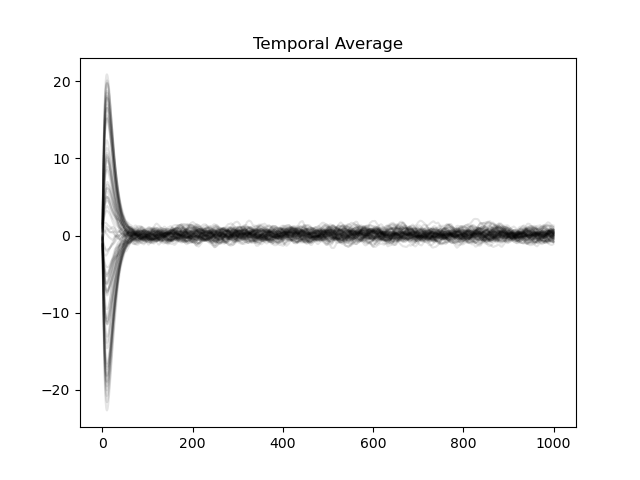

In [2]:
jrm = models.JansenRit(mu=numpy.array([0.]), v0=numpy.array([6.]))

phi_n_scaling = (jrm.a * jrm.A * (jrm.p_max-jrm.p_min) * 0.5 )**2 / 2.
sigma         = numpy.zeros(6) 
sigma[3]      = phi_n_scaling

# the other aspects of the simulator are standard
sim = simulator.Simulator(
    model=jrm,
    connectivity=connectivity.Connectivity.from_file(),
    coupling=coupling.SigmoidalJansenRit(a=numpy.array([10.0])),
    integrator=integrators.HeunStochastic(dt=2 ** -4, noise=noise.Additive(nsig=sigma)),
    monitors=(monitors.TemporalAverage(period=2 ** -2),),
    simulation_length=1e3,
).configure()

# run it
(time, data), = sim.run()

# visualize time series
plt.figure()
plt.plot(time, data[:, 0, :, 0], 'k', alpha=0.1)
plt.title("Temporal Average")